In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data= pd.read_excel('Participants_Data/Data_Train.xlsx')
print('Train data shape: ', train_data.shape)

Train data shape:  (6237, 9)


In [3]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   object 
 4   Ratings       6237 non-null   object 
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB


In [5]:
train_data['Price'].describe()

count     6237.000000
mean       560.707516
std        690.110657
min         25.000000
25%        249.180000
50%        373.000000
75%        599.000000
max      14100.000000
Name: Price, dtype: float64

In [6]:
train_data.isnull().sum()

Title           0
Author          0
Edition         0
Reviews         0
Ratings         0
Synopsis        0
Genre           0
BookCategory    0
Price           0
dtype: int64

In [7]:
train_data['Reviews']=train_data['Reviews'].apply(lambda x: float(x.split()[0]))
train_data['Ratings'] = train_data['Ratings'].apply(lambda x: (x.split()[0].replace(',',''))).astype(float)
train_data['Edition_date']=train_data['Edition'].apply(lambda x: x.split(',– ')[-1])
train_data['Edition_type']=train_data['Edition'].apply(lambda x: x.split(',– ')[0])
print(train_data.info())
train_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         6237 non-null   object 
 1   Author        6237 non-null   object 
 2   Edition       6237 non-null   object 
 3   Reviews       6237 non-null   float64
 4   Ratings       6237 non-null   float64
 5   Synopsis      6237 non-null   object 
 6   Genre         6237 non-null   object 
 7   BookCategory  6237 non-null   object 
 8   Price         6237 non-null   float64
 9   Edition_date  6237 non-null   object 
 10  Edition_type  6237 non-null   object 
dtypes: float64(3), object(8)
memory usage: 536.1+ KB
None


,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price,Edition_date,Edition_type
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0,8.0,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00,10 Mar 2016,Paperback
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9,14.0,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93,7 Nov 2012,Paperback
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8,6.0,"""During the time men live without a common Pow...",International Relations,Humour,299.00,25 Feb 1982,Paperback
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1,13.0,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00,5 Oct 2017,Paperback
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0,1.0,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62,10 Oct 2006,Hardcover


In [8]:
train_data.drop(['Title', 'Edition', 'Synopsis', 'Genre'],1,inplace=True)

In [9]:
cat_cols= train_data.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    print (f" col name : {col}, N Unique : {train_data[col].nunique()}")

 col name : Author, N Unique : 3679
 col name : BookCategory, N Unique : 11
 col name : Edition_date, N Unique : 2942
 col name : Edition_type, N Unique : 19


In [10]:
train_data.head()

,Author,Reviews,Ratings,BookCategory,Price,Edition_date,Edition_type
0,Chris Kuzneski,4.0,8.0,Action & Adventure,220.00,10 Mar 2016,Paperback
1,Arun Khopkar,3.9,14.0,"Biographies, Diaries & True Accounts",202.93,7 Nov 2012,Paperback
2,Thomas Hobbes,4.8,6.0,Humour,299.00,25 Feb 1982,Paperback
3,Agatha Christie,4.1,13.0,"Crime, Thriller & Mystery",180.00,5 Oct 2017,Paperback
4,Editors of Life,5.0,1.0,"Arts, Film & Photography",965.62,10 Oct 2006,Hardcover


In [11]:
train_data.Edition_type.value_counts()

Paperback                5193
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
(Kannada),Paperback         1
Board book                  1
Plastic Comb                1
(French),Paperback          1
Library Binding             1
(Spanish),Paperback         1
Product Bundle              1
(German),Paperback          1
Leather Bound               1
Perfect Paperback           1
Name: Edition_type, dtype: int64

In [12]:
train_data.Edition_type.replace('(German),Paperback','Paperback', inplace=True)
train_data.Edition_type.replace('(Kannada),Paperback','Paperback', inplace=True)
train_data.Edition_type.replace('(Spanish),Paperback','Paperback', inplace=True)
train_data.Edition_type.replace('(French),Paperback','Paperback', inplace=True)

train_data.Edition_type.unique()

array(['Paperback', 'Hardcover', 'Mass Market Paperback', 'Sheet music',
       'Flexibound', 'Plastic Comb', 'Loose Leaf', 'Tankobon Softcover',
       'Perfect Paperback', 'Board book', 'Cards', 'Spiral-bound',
       'Product Bundle', 'Library Binding', 'Leather Bound'], dtype=object)

In [13]:
train_data.Edition_type.value_counts()

Paperback                5197
Hardcover                 823
Mass Market Paperback     155
Sheet music                24
Flexibound                 15
Cards                       8
Spiral-bound                4
Tankobon Softcover          3
Loose Leaf                  2
Leather Bound               1
Product Bundle              1
Library Binding             1
Board book                  1
Plastic Comb                1
Perfect Paperback           1
Name: Edition_type, dtype: int64

In [14]:
train_data.Edition_date.value_counts()

2016           48
5 Oct 2017     48
2017           37
2013           33
2015           32
               ..
13 Sep 2011     1
27 Sep 2007     1
20 Apr 2019     1
14 Sep 2004     1
17 Dec 2012     1
Name: Edition_date, Length: 2942, dtype: int64

In [15]:
train_data['Edition_year']=train_data.Edition_date.apply(lambda x: (x.split()[-1] if x.split()[-1].isdigit() else '2018'))

In [16]:
train_data['Edition_year'].value_counts()

2018    832
2017    757
2016    659
2015    519
2014    402
2013    388
2019    361
2012    304
2011    267
2010    235
2009    182
2008    163
2005    125
2006    110
2007    108
2003     99
2004     85
2002     72
2000     69
2001     66
1999     39
1994     33
1997     33
1998     31
1992     31
1995     30
1996     27
1993     22
1989     20
1991     19
1986     16
1984     15
1988     15
1990     14
1982     14
1987     13
1983     10
1985     10
1976      6
1980      5
1975      4
1971      4
1964      3
1974      3
1977      3
1978      2
1960      2
1979      2
1900      1
1981      1
1905      1
1925      1
1961      1
1970      1
1973      1
1969      1
Name: Edition_year, dtype: int64

In [17]:
train_data.drop('Edition_date',1,inplace=True)
train_data.head()

,Author,Reviews,Ratings,BookCategory,Price,Edition_type,Edition_year
0,Chris Kuzneski,4.0,8.0,Action & Adventure,220.00,Paperback,2016
1,Arun Khopkar,3.9,14.0,"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,Thomas Hobbes,4.8,6.0,Humour,299.00,Paperback,1982
3,Agatha Christie,4.1,13.0,"Crime, Thriller & Mystery",180.00,Paperback,2017
4,Editors of Life,5.0,1.0,"Arts, Film & Photography",965.62,Hardcover,2006


In [18]:
train_data.Author.value_counts()

Agatha Christie                                                              69
Ladybird                                                                     49
DK                                                                           48
Albert Uderzo                                                                34
Herge                                                                        34
                                                                             ..
Mineke Schipper                                                               1
S.T.Imam                                                                      1
Pradeep Chakravarthy, Anil Choudhry, Jayashree Kumar, Girija Viraraghavan     1
Dinesh Prasad                                                                 1
Workman Publishing                                                            1
Name: Author, Length: 3679, dtype: int64

In [19]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Author        6237 non-null   object 
 1   Reviews       6237 non-null   float64
 2   Ratings       6237 non-null   float64
 3   BookCategory  6237 non-null   object 
 4   Price         6237 non-null   float64
 5   Edition_type  6237 non-null   object 
 6   Edition_year  6237 non-null   object 
dtypes: float64(3), object(4)
memory usage: 341.2+ KB


In [20]:
train_data['BookCategory']=train_data['BookCategory'].astype("category")
train_data['Edition_type']=train_data['Edition_type'].astype("category")
train_data['Author']=train_data['Author'].astype("category")
train_data['Edition_year']=train_data['Edition_year'].astype("category")
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Author        6237 non-null   category
 1   Reviews       6237 non-null   float64 
 2   Ratings       6237 non-null   float64 
 3   BookCategory  6237 non-null   category
 4   Price         6237 non-null   float64 
 5   Edition_type  6237 non-null   category
 6   Edition_year  6237 non-null   category
dtypes: category(4), float64(3)
memory usage: 369.6 KB


In [21]:
train_data.Author.value_counts()

Agatha Christie                 69
Ladybird                        49
DK                              48
Albert Uderzo                   34
Herge                           34
                                ..
Myrna Bell Rochester             1
Myatt Murphy                     1
My Little Pony                   1
Murugesan Ramaswamy              1
0, Butterfield, Ngondi, Kerr     1
Name: Author, Length: 3679, dtype: int64

In [22]:
#train_data1= pd.get_dummies(train_data, columns= ['BookCategory','Edition_type'], drop_first=True)
#train_data1.head()

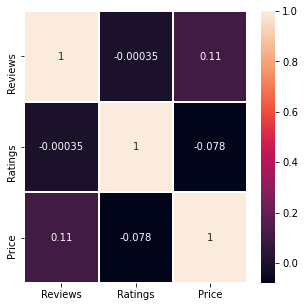

In [23]:
plt.rcParams['figure.figsize'] = 5, 5
sns.heatmap(train_data.corr(),annot=True, linewidths=1)

In [24]:
train_data.head()

,Author,Reviews,Ratings,BookCategory,Price,Edition_type,Edition_year
0,Chris Kuzneski,4.0,8.0,Action & Adventure,220.00,Paperback,2016
1,Arun Khopkar,3.9,14.0,"Biographies, Diaries & True Accounts",202.93,Paperback,2012
2,Thomas Hobbes,4.8,6.0,Humour,299.00,Paperback,1982
3,Agatha Christie,4.1,13.0,"Crime, Thriller & Mystery",180.00,Paperback,2017
4,Editors of Life,5.0,1.0,"Arts, Film & Photography",965.62,Hardcover,2006


In [25]:
train_data['Author']=train_data.Author.cat.codes
train_data['BookCategory']=train_data.BookCategory.cat.codes
train_data['Edition_type']=train_data.Edition_type.cat.codes
train_data['Edition_year']=train_data.Edition_year.cat.codes

In [26]:
train_data.head()

,Author,Reviews,Ratings,BookCategory,Price,Edition_type,Edition_year
0,615,4.0,8.0,0,220.00,8,52
1,307,3.9,14.0,2,202.93,8,48
2,3390,4.8,6.0,6,299.00,8,18
3,62,4.1,13.0,5,180.00,8,53
4,953,5.0,1.0,1,965.62,3,42


In [31]:
train_data.corr()

,Author,Reviews,Ratings,BookCategory,Price,Edition_type,Edition_year
Author,1.000000,-0.015712,-0.002371,-0.003658,-0.002670,0.005423,0.009237
Reviews,-0.015712,1.000000,-0.000347,-0.045656,0.108373,-0.050012,0.003495
Ratings,-0.002371,-0.000347,1.000000,-0.004905,-0.078063,0.018656,0.026701
BookCategory,-0.003658,-0.045656,-0.004905,1.000000,-0.011616,0.013182,0.027007
Price,-0.002670,0.108373,-0.078063,-0.011616,1.000000,-0.218052,-0.015062
Edition_type,0.005423,-0.050012,0.018656,0.013182,-0.218052,1.000000,-0.101596
Edition_year,0.009237,0.003495,0.026701,0.027007,-0.015062,-0.101596,1.000000


In [32]:
from scipy.stats import boxcox
target=boxcox(train_data.Price)[0]

In [33]:
train_data.drop('Price', 1,inplace=True)

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_data, target, test_size=0.20)

In [40]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [41]:
y_pred = regressor.predict(X_val)

In [49]:
from sklearn.metrics import mean_squared_error as mse

mse(y_val, y_pred)

0.0750610582582033